<a href="https://colab.research.google.com/github/nopby/CV/blob/main/TGS0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
import cv2
import matplotlib.pyplot as plt
import numpy
import math

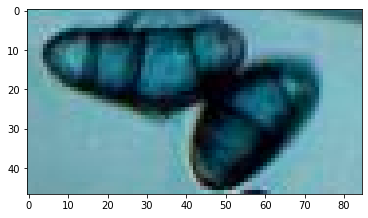

In [290]:
img = cv2.imread('Bakteri_A.jpeg')

# Potong
observe = img[100:147, 85:170]

plt.imshow(observe)

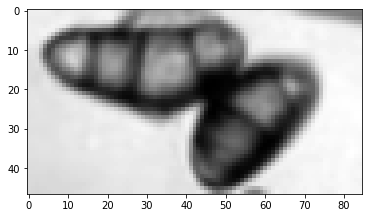

In [292]:
# Gray
img = cv2.cvtColor(observe, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (3, 3), 0)
plt.imshow(img, cmap="gray")

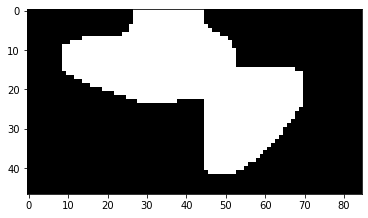

In [294]:
# MASK 1
ret, th = cv2.threshold(img, 155, 255, 1)
kernel = numpy.ones((7,7),numpy.uint8)
erosi = cv2.morphologyEx(th, cv2.MORPH_ERODE, kernel)
open = cv2.morphologyEx(erosi, cv2.MORPH_OPEN, kernel)
plt.imshow(open, cmap="gray")

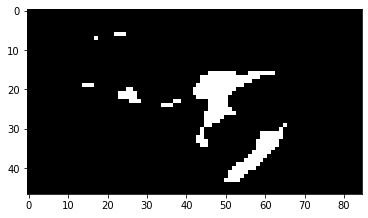

In [295]:
# MASK 2
ret, th = cv2.threshold(img, 20, 255, 1)
kernel = numpy.ones((3,3),numpy.uint8)
plt.imshow(th, cmap="gray")

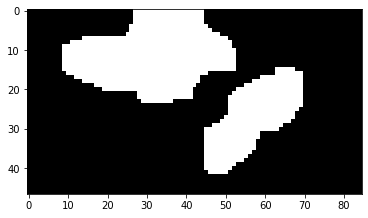

In [297]:
# MASK 1 - 2
result = cv2.subtract(open, th)
result_open = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel)
result_open = cv2.morphologyEx(result_open, cv2.MORPH_DILATE, kernel)
result_open = cv2.morphologyEx(result_open, cv2.MORPH_ERODE, kernel)
plt.imshow(result_open, 'gray')

In [302]:
def GetCentroid(contour):
  M = cv2.moments(contour)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])
  return [cx, cy]

In [303]:
# Centroid
contours, hierarchy = cv2.findContours(result_open, 1, 2)
centroid0 = GetCentroid(contours[0])
centroid1 = GetCentroid(contours[1])
print("centroid0:", centroid0)
print("centroid1:", centroid1)

centroid0: [56, 27]
centroid1: [31, 11]


In [311]:
x = centroid0[0] - centroid1[0]
y = centroid0[1] - centroid1[1]
euclidean_distance = math.sqrt(x*x+y*y)
print("Jarak: ", euclidean_distance)

Jarak:  29.68164415931166
